<a href="https://colab.research.google.com/github/Glauciocsilva/Glauciocsilva/blob/main/Projeto_Pratico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import seaborn  as sns # biblioteca para visulização grafica 
from matplotlib import pyplot as plt
import numpy as np #biblioteca

In [ ]:
df = pd.read_excel("casas_para_aluguel.xlsx")

In [ ]:
df.head(n=5)

,cidade,area,quartos,banheiros,vagas_estacionamento,andar,animal,mobiliado,taxa_condominio,preco_aluguel,taxa_iptu,taxa_incendio,total_aluguel
0,São Paulo,70.0,2.0,1.0,1.0,7,sim,sim,2065.0,3300.0,211.0,42.0,5618.0
1,São Paulo,320.0,4.0,4.0,0.0,20,sim,nao,1200.0,4960.0,1750.0,63.0,7973.0
2,Porto Alegre,80.0,1.0,1.0,1.0,6,sim,nao,1000.0,2800.0,0.0,41.0,3841.0
3,Porto Alegre,51.0,2.0,1.0,0.0,2,sim,nao,270.0,1112.0,22.0,17.0,1421.0
4,São Paulo,25.0,1.0,1.0,0.0,1,nao,nao,0.0,800.0,25.0,11.0,836.0


Informação resumo do conjunto de dados 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cidade                10692 non-null  object 
 1   area                  10692 non-null  float64
 2   quartos               10692 non-null  float64
 3   banheiros             10692 non-null  float64
 4   vagas_estacionamento  10692 non-null  float64
 5   andar                 10692 non-null  object 
 6   animal                10692 non-null  object 
 7   mobiliado             10692 non-null  object 
 8   taxa_condominio       10692 non-null  float64
 9   preco_aluguel         10692 non-null  float64
 10  taxa_iptu             10692 non-null  float64
 11  taxa_incendio         10692 non-null  float64
 12  total_aluguel         10692 non-null  float64
dtypes: float64(9), object(4)
memory usage: 1.1+ MB


0 Conjunto de dados possui 13 colunas e 10.692 registros de casas

In [ ]:
df.describe().round(2) #comando para analise estatistica descritiva 

,area,quartos,banheiros,vagas_estacionamento,taxa_condominio,preco_aluguel,taxa_iptu,taxa_incendio,total_aluguel
count,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00
mean,149.22,2.51,2.24,1.61,1174.02,3896.25,366.70,53.30,5490.49
std,537.02,1.17,1.41,1.59,15592.31,3408.55,3107.83,47.77,16484.73
min,11.00,1.00,1.00,0.00,0.00,450.00,0.00,3.00,499.00
25%,56.00,2.00,1.00,0.00,170.00,1530.00,38.00,21.00,2061.75
50%,90.00,2.00,2.00,1.00,560.00,2661.00,125.00,36.00,3581.50
75%,182.00,3.00,3.00,2.00,1237.50,5000.00,375.00,68.00,6768.00
max,46335.00,13.00,10.00,12.00,1117000.00,45000.00,313700.00,677.00,1120000.00


Em quais cidades se concentram a maior quantidade de casas?

In [ ]:
df["cidade"].value_counts() #cmdo para mostrar a quantidade de cada registro na coluna cidade entre colchetes 

São Paulo         5887
Rio de Janeiro    1501
Belo Horizonte    1258
Porto Alegre      1193
Campinas           853
Name: cidade, dtype: int64

In [ ]:
df["cidade"].unique() #traz os valores unicos da coluna

array(['São Paulo', 'Porto Alegre', 'Rio de Janeiro', 'Campinas',
       'Belo Horizonte'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


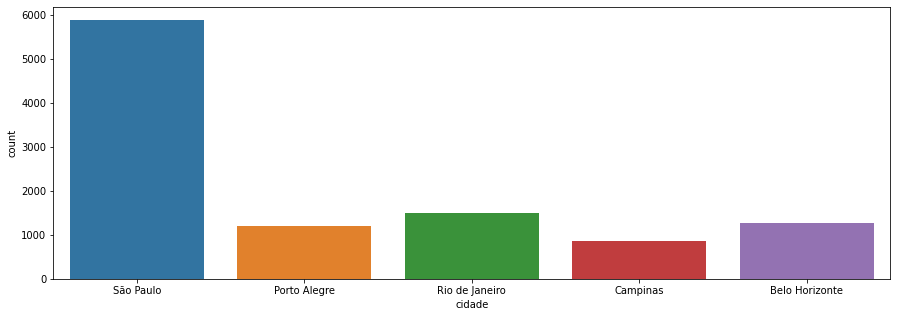

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(df["cidade"])
plt.show()

Em quais cidades estão os imóveis com maior preço de aluguel?

In [ ]:
df["total_aluguel"].describe().round(2)

count      10692.00
mean        5490.49
std        16484.73
min          499.00
25%         2061.75
50%         3581.50
75%         6768.00
max      1120000.00
Name: total_aluguel, dtype: float64

In [ ]:
df.groupby("cidade")["total_aluguel"].median()

cidade
Belo Horizonte    3040.0
Campinas          2140.0
Porto Alegre      2211.0
Rio de Janeiro    3253.0
São Paulo         4596.0
Name: total_aluguel, dtype: float64

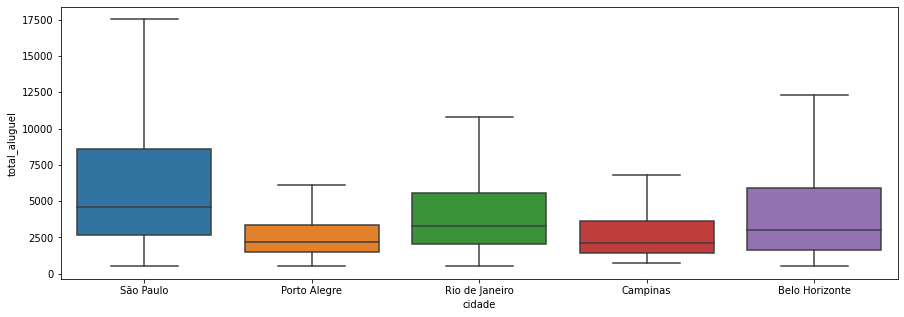

In [ ]:
# para melhorar a visualização retira se os dados discrepantes com o adicional de showfliers = false
plt.figure(figsize=(15,5))
sns.boxplot(x= "cidade" , y= "total_aluguel" , data=df , showfliers = False)
plt.show()


Ter animais impacta no preço do aluguel?

In [ ]:
df.head()

,cidade,area,quartos,banheiros,vagas_estacionamento,andar,animal,mobiliado,taxa_condominio,preco_aluguel,taxa_iptu,taxa_incendio,total_aluguel
0,São Paulo,70.0,2.0,1.0,1.0,7,sim,sim,2065.0,3300.0,211.0,42.0,5618.0
1,São Paulo,320.0,4.0,4.0,0.0,20,sim,nao,1200.0,4960.0,1750.0,63.0,7973.0
2,Porto Alegre,80.0,1.0,1.0,1.0,6,sim,nao,1000.0,2800.0,0.0,41.0,3841.0
3,Porto Alegre,51.0,2.0,1.0,0.0,2,sim,nao,270.0,1112.0,22.0,17.0,1421.0
4,São Paulo,25.0,1.0,1.0,0.0,1,nao,nao,0.0,800.0,25.0,11.0,836.0


In [ ]:
df['animal'].unique()

array(['sim', 'nao'], dtype=object)

In [ ]:
df['animal'].value_counts()

sim    8316
nao    2376
Name: animal, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


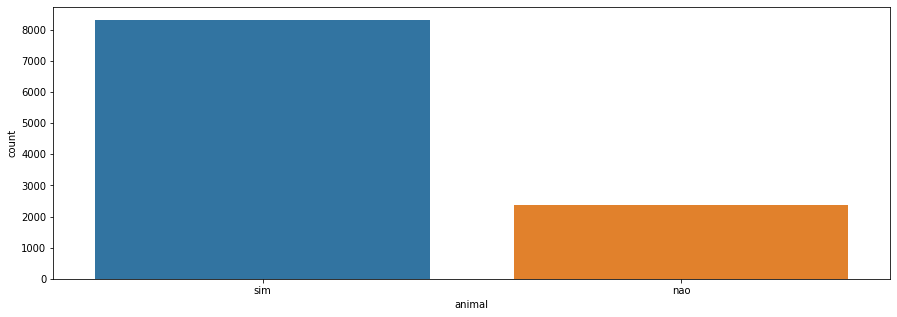

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(df["animal"])
plt.show()

In [ ]:
df.groupby("animal")["total_aluguel"].median()

animal
nao    3217.5
sim    3701.0
Name: total_aluguel, dtype: float64

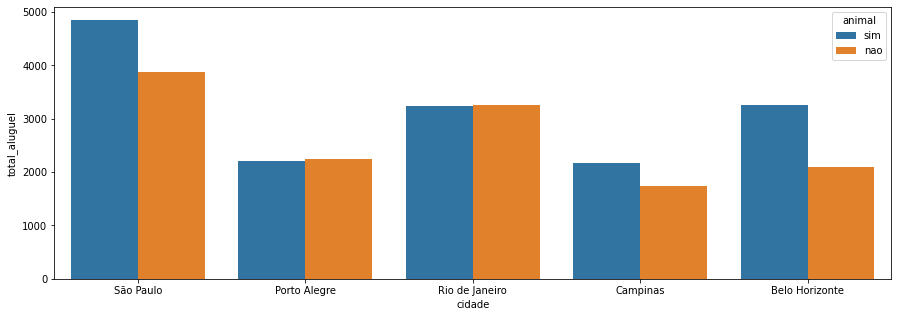

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x=df['cidade'] , y=df['total_aluguel'], hue=df['animal'], ci=False, estimator=np.median)

As casas mobiliadas possuem um preço de aluguel mais alto?

In [ ]:
df['mobiliado'].unique()

array(['sim', 'nao'], dtype=object)

In [ ]:
df.groupby("mobiliado")["total_aluguel"].median()

mobiliado
nao    3170.0
sim    4855.5
Name: total_aluguel, dtype: float64

<Figure size 1080x360 with 0 Axes>

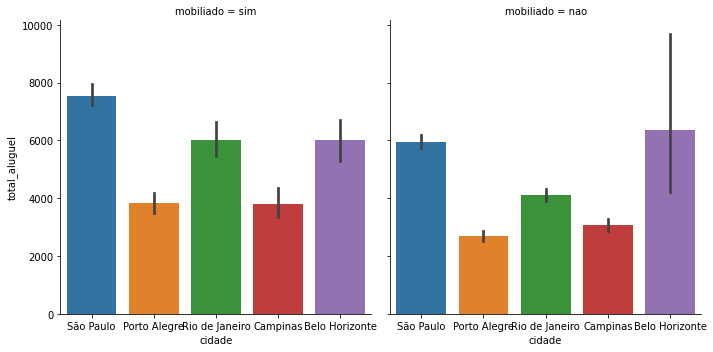

In [ ]:
plt.figure(figsize=(15,5))
sns.catplot(x='cidade' ,y='total_aluguel' , col='mobiliado', kind='bar' , data=df ,  )